In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f
players1 = pd.read_csv("phs_2020_1.csv")
players2 = pd.read_csv("phs_2020_2.csv")
combine = [players1, players2]
data = pd.concat(combine).drop(['start_time'], axis=1)
data.drop(data.index[data['tournament_title'] != 'OWL 2020 Regular Season'], inplace=True)
data.drop(['tournament_title'], axis = 1, inplace = True)
cols = ['esports_match_id', 'map_type', 'map_name', 'player_name', 'team_name', 'hero_name', 'stat_name', 'stat_amount']
data = data.reindex(columns = cols)
data = data[data["hero_name"] != "All Heroes"]
stats = ['Hero Damage Done', 'Assists', 'Barrier Damage Done', 'Deaths', 'Eliminations', 'Objective Kills', 'Objective Time', 'Ultimates Earned - Fractional', 'Final Blows', 'Damage Blocked', 'Healing Done']
data = data.loc[data['stat_name'].isin(stats)]
data['stat_amount'] = data['stat_amount'].round(decimals = 2)

# Tidy dataset to elongate stat_name column into rows and insert respective stat_amount values
data = data[['stat_name', 'stat_amount', 'player_name','esports_match_id','hero_name','map_name', 'team_name']].copy().reset_index()
data = data[['stat_name', 'stat_amount', 'player_name','esports_match_id','hero_name','map_name', 'team_name']]
data = data.pivot_table(values='stat_amount', index=[data['esports_match_id'],data['team_name'], data['player_name'], data['map_name'], data['hero_name']], columns='stat_name', aggfunc='sum')
data = data.fillna(0)
data = data.reset_index()
data.rename(columns = {'Ultimates Earned - Fractional':'Ultimates Earned'}, inplace = True)
print(data['esports_match_id'].max())
print(data['esports_match_id'].min())
data['map_name'].replace({'King\'s Row': 'Kings Row'}, inplace = True)
data

35554
30991


stat_name,esports_match_id,team_name,player_name,map_name,hero_name,Assists,Barrier Damage Done,Damage Blocked,Deaths,Eliminations,Final Blows,Healing Done,Hero Damage Done,Objective Kills,Objective Time,Ultimates Earned
0,30991,Paris Eternal,BenBest,Eichenwalde,Reinhardt,10.0,5517.72,32655.81,9.0,19.0,9.0,0.00,8976.92,10.0,295.96,7.97
1,30991,Paris Eternal,BenBest,Havana,Reinhardt,6.0,3075.00,21137.18,11.0,10.0,4.0,0.00,6837.43,3.0,148.89,5.15
2,30991,Paris Eternal,BenBest,Horizon Lunar Colony,Reinhardt,13.0,3236.46,19394.67,10.0,21.0,8.0,0.00,8945.56,8.0,114.43,6.52
3,30991,Paris Eternal,BenBest,Lijiang Tower,Reinhardt,11.0,1875.00,14640.91,5.0,13.0,2.0,0.00,4798.16,9.0,65.05,3.71
4,30991,Paris Eternal,FDGod,Eichenwalde,Lúcio,14.0,5175.00,0.00,9.0,18.0,2.0,9229.73,6836.14,9.0,167.42,7.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24946,35554,Seoul Dynasty,Profit,Temple of Anubis,Pharah,0.0,0.00,0.00,1.0,1.0,1.0,0.00,883.85,0.0,0.00,0.63
24947,35554,Seoul Dynasty,tobi,Busan,Mercy,1.0,30.00,0.00,2.0,3.0,2.0,6772.00,200.00,0.0,8.23,3.85
24948,35554,Seoul Dynasty,tobi,Kings Row,Mercy,1.0,20.00,0.00,1.0,2.0,1.0,9917.83,407.64,1.0,41.80,5.33
24949,35554,Seoul Dynasty,tobi,Temple of Anubis,Lúcio,1.0,20.00,0.00,0.0,2.0,1.0,295.03,552.82,1.0,18.45,0.35


Blizzard also released data that had every Overwatch League played matches from 2018 to 2021. We are only going to look at the professional Overwatch League 2020 regular season matches.

In [84]:
maps = pd.read_csv("match_map_stats.csv")
maps.head()

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,2018-01-11 00:12:07,2018-01-11 00:20:07,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.615051,0.000000,0.000000,240.000000,NaN,NaN,2,0
1,2018-01-11 00:22:05,2018-01-11 00:27:59,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.649597,75.615051,125.750572,0.000000,NaN,NaN,3,2
2,2018-01-11 00:34:39,2018-01-11 00:38:29,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,250.492004,240.000000,NaN,NaN,2,0
3,2018-01-11 00:40:27,2018-01-11 00:44:41,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,225.789032,250.492004,NaN,NaN,2,2
4,2018-01-11 00:46:09,2018-01-11 00:49:48,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,36.396057,250.492004,NaN,NaN,4,2


In our maps data set we have 25 columns, and they most of them are not important but the important ones are:
 - ```match_id``` - The number referencing the matches in which the teams competed. A series of matches will have the same match_id.
 - ```team_one``` and team_two - Two team names from the map played
 - ```map_winner``` - Winner of the map
 - ```map_name``` - Names of the maps on which the games were played.
 - ```game_number``` - The number of the map played in the match
 - ```match_winner``` - Winner of the entire match of maps

We will remove the unncessary columns and only keep the match_id, the two team names, map name, map winner, game number, and the match winner. The only issue is each Overwatch game has multiple rounds of each game, so the data has rows for each teams attack and defense or overtime. These excessive rows are not needed because all of the rows display the same team names, map winner, and match winner so we can drop duplicate rows.

In [34]:
maps['map_name'].replace({'King\'s Row': 'Kings Row'}, inplace = True)
cleaned_maps = pd.DataFrame()
# Only takes match id of 2020 season games which is between match ids of 30991 and 36231 from the player data table
maps.query("`match_id` >= 30991", inplace = True)
maps.query("`match_id` <= 36231", inplace = True)
cleaned_maps = pd.DataFrame(maps, columns = ['match_id', 'team_one_name', 'team_two_name', 'map_winner', 'map_name', 'game_number', 'match_winner'])
# Only took necessary columns
cleaned_maps.rename(columns = {'team_one_name': 'team_one', 'team_two_name': 'team_two'}, inplace = True)
cleaned_maps.drop_duplicates(inplace = True)
cleaned_maps.head()

,match_id,team_one,team_two,map_winner,map_name,game_number,match_winner
6246,30991,Toronto Defiant,Paris Eternal,Paris Eternal,Lijiang Tower,1,Toronto Defiant
6248,30991,Paris Eternal,Toronto Defiant,Toronto Defiant,Eichenwalde,2,Toronto Defiant
6252,30991,Paris Eternal,Toronto Defiant,Toronto Defiant,Horizon Lunar Colony,3,Toronto Defiant
6255,30991,Paris Eternal,Toronto Defiant,Toronto Defiant,Havana,4,Toronto Defiant
6257,30992,London Spitfire,New York Excelsior,London Spitfire,Lijiang Tower,1,New York Excelsior


We can see that there are not many visibile errors except team_one and team_two sometimes switch which name comes first in team_one and team_two. So here we fix that by putting them in alphabetical order.

In [35]:
new_frame = pd.DataFrame(columns = cleaned_maps.columns)
for index, row in cleaned_maps.iterrows():
    if row['team_two'] < row['team_one']:
        new_frame.loc[index] = [row['match_id'], row['team_two'], row['team_one'], row['map_winner'], row['map_name'], row['game_number'], row['match_winner']]
    else:
        new_frame.loc[index] = [row['match_id'], row['team_one'], row['team_two'], row['map_winner'], row['map_name'], row['game_number'], row['match_winner']]
cleaned_maps = new_frame
cleaned_maps.head()      

,match_id,team_one,team_two,map_winner,map_name,game_number,match_winner
6246,30991,Paris Eternal,Toronto Defiant,Paris Eternal,Lijiang Tower,1,Toronto Defiant
6248,30991,Paris Eternal,Toronto Defiant,Toronto Defiant,Eichenwalde,2,Toronto Defiant
6252,30991,Paris Eternal,Toronto Defiant,Toronto Defiant,Horizon Lunar Colony,3,Toronto Defiant
6255,30991,Paris Eternal,Toronto Defiant,Toronto Defiant,Havana,4,Toronto Defiant
6257,30992,London Spitfire,New York Excelsior,London Spitfire,Lijiang Tower,1,New York Excelsior


Now that we have our map data tidy we can perform analysis on the two data sets we have created.

# Pick Rate per Hero

One way of measuring how "good" a hero is in Overwatch is looking at the pick rate of each hero on different maps in Overwatch League. We wanted to see how much these numbers vary for different heroes, and we could then measure if a professional teams' decision to pick certain heroes is a good decision.

In [86]:
map_list = data['map_name'].unique()
hero_list = data['hero_name'].unique()
# Pick rate is going to be a dictionary whose keys are the map names, and the values are dictionaries whose keys
# are the hero names and the values are the number of picks for each hero on that map.
pick_rate = {}
for name in map_list:
    # Initialized dictionary of map pick rate per hero 
    map_rate = {}
    for val in hero_list:
        map_rate[val] = 0
    for index, row in data.iterrows():
        #row[3] is map, and row[4] is hero
        if row[3] == name:
            # Increments the pick value of the hero if it appears in the row
            map_rate[row[4]] = map_rate[row[4]] + 1
    # assigns the dictionary to its map key
    pick_rate[name] = map_rate
pick_frame = pd.DataFrame()

# Converts the double dictionary structure into a dataframe
for name_map in map_list:
    for name_hero in hero_list:
        temp_dict = {'map_name': name_map, 'hero_name': name_hero, 'pick': pick_rate.get(name_map, 0).get(name_hero, 0)}
        pick_frame = pick_frame.append(temp_dict, ignore_index = True)
pick_frame.head()
        

,map_name,hero_name,pick
0,Eichenwalde,Reinhardt,34.0
1,Eichenwalde,Lúcio,59.0
2,Eichenwalde,Baptiste,54.0
3,Eichenwalde,Moira,35.0
4,Eichenwalde,Ana,45.0


Now we will plot the pick rate for each hero on each map on a heat map

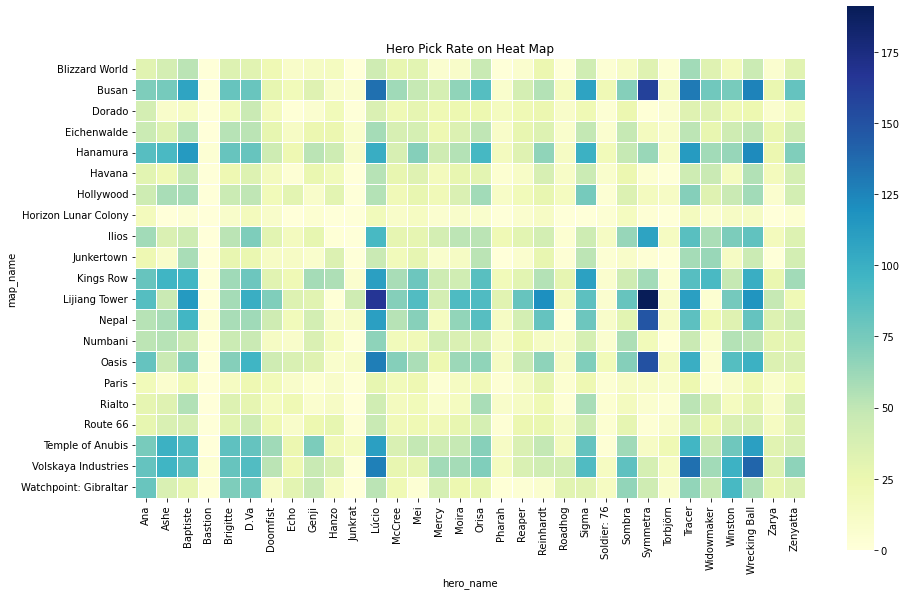

In [88]:
new_data = pick_frame.pivot(index='map_name', columns='hero_name', values='pick')
figure, axis = plt.subplots(figsize=(15,10))
plt.title('Hero Pick Rate on Heat Map')
# cmap will change the color to better support our analysis
sns.heatmap(new_data,cmap = "YlGnBu", ax=axis, square=True, linewidths=.6)
plt.show()

As we look at this heat map we see some very obvious trends. The darkest square or highest pick rate is clearly Symmetra on Lijiang Tower which makes sense. In the 2020 regular season of Overwatch, the most frequent strategy for teams was to use Symmetra's teleport to get to the control site much faster. Another common hero picked was Lucio on maps like Lijiang Tower, Nepal, and Ilios because Lucio has an ability to push back enemies. This is very useful on maps with holes or openings to be pushed to their death such as Lijiang Tower, Nepal, and Ilios. We can see other strategies/patterns in this heat map as we look at the least played heroes on maps in Overwatch League. These heroes include Bastion, Junkrat, Pharah, and Torbjorn who have seen very little pick rates as they are the most situational characters in the game. In high ranked gameplay, characters that can be easily countered such as these four are rarely seen on the competitive stage.

Another useful insight is to look at the dominant heroes in their subclasses. As we can see in terms of healers, Baptiste and Lucio have the highest pick rates across maps. Lucio, since the creation of Overwatch, has been viewed as the most consistently viable hero on a large number of maps. In terms of damagers (dps), Tracer and Ashe have the highest pick rates across maps, and for tanks, Wrecking Ball, Orisa, and D.Va have the highest pick rates. Additionally, an interesting analysis can be made on Symmetra's pick rates. While she appears to have an incredibly high pick rate, she really only has a very high pick rate on 4-5 maps and an extremely low pick rate on at least 8 maps. This shows how good Symmetra is but also how situational she can be on maps such as Busan, Oasis, and Nepal.

# Linear Regression for Wins

We noticed that there are a lot of statistics to consider for each hero played as well as the "class" these heroes fall into. The three classes as mentioned before are Supports (Healer), Damager (DPS), and Tank. We wanted to see which stats are statistically significant to a hero's team winning the map. We looked at the 11 basic stats for each hero's class:
 - ```Assists```
 - ```Deaths```
 - ```Eliminations```
 - ```Hero Damage Done```
 - ```Ultimates Earned```
 - ```Objective Kills```
 - ```Objective Time```
 - ```Final Blows```
 - ```Healing Done``` - Primarily used for Healers
 - ```Barrier Damage Done``` - Primarily used for Tanks and Damagers
 - ```Damage Blocked``` - Primarily used for Tanks
 

In [41]:
merged_df = pd.merge(data, cleaned_maps, how = 'left', left_on = ['esports_match_id', 'map_name'], right_on = ['match_id', 'map_name'])
def win_calc (row):
    # 1 represents the team in that row won the map
    if (row['team_name'] == row['map_winner']):
        return 1
    return 0
merged_df['winner'] = merged_df.apply(lambda row: win_calc(row), axis=1)
merged_df.drop(['team_one', 'team_two', 'game_number', 'match_winner', 'match_id', 'map_winner'], axis = 1, inplace = True)
merged_df.head()

,esports_match_id,team_name,player_name,map_name,hero_name,Assists,Barrier Damage Done,Damage Blocked,Deaths,Eliminations,Final Blows,Healing Done,Hero Damage Done,Objective Kills,Objective Time,Ultimates Earned,winner
0,30991,Paris Eternal,BenBest,Eichenwalde,Reinhardt,10.0,5517.72,32655.81,9.0,19.0,9.0,0.00,8976.92,10.0,295.96,7.97,0
1,30991,Paris Eternal,BenBest,Havana,Reinhardt,6.0,3075.00,21137.18,11.0,10.0,4.0,0.00,6837.43,3.0,148.89,5.15,0
2,30991,Paris Eternal,BenBest,Horizon Lunar Colony,Reinhardt,13.0,3236.46,19394.67,10.0,21.0,8.0,0.00,8945.56,8.0,114.43,6.52,0
3,30991,Paris Eternal,BenBest,Lijiang Tower,Reinhardt,11.0,1875.00,14640.91,5.0,13.0,2.0,0.00,4798.16,9.0,65.05,3.71,1
4,30991,Paris Eternal,FDGod,Eichenwalde,Lúcio,14.0,5175.00,0.00,9.0,18.0,2.0,9229.73,6836.14,9.0,167.42,7.03,0


First we have to add a wins column that will act as the dependent variable in our regression. I had to merge the map data with our player data to add a winner column.

In [133]:
damagers = ['Ashe', 'Bastion', 'McCree', 'Echo', 'Genji', 'Hanzo', 'Junkrat', 'Mei', 'Pharah', 'Reaper', 'Soldier: 76', 'Sombra', 'Symmetra'
           'Torbjörn', 'Tracer', 'Widowmaker']
tanks = ['D.Va', 'Doomfist', 'Orisa', 'Reinhardt', 'Roadhog', 'Sigma', 'Winston', 'Wrecking Ball', 'Zarya']
supports = ['Ana', 'Baptiste', 'Brigitte', 'Lúcio', 'Mercy', 'Moira', 'Zenyatta']
classes = ['Damage', 'Support', 'Tank']
res_array = []
# For loop runs through the 3 classes of heroes
for curr_class in classes:
    # Take rows of only heroes of the current class
    if (curr_class == 'Damage'):
        curr_table = merged_df.loc[merged_df['hero_name'].isin(damagers)].copy()
        formula_class = 'winner ~ Assists + Deaths + Eliminations + Hero_Damage_Done + Ultimates_Earned + Objective_Kills + Objective_Time + Final_Blows + Barrier_Damage_Done'
    elif (curr_class == 'Support'):
        curr_table = merged_df.loc[merged_df['hero_name'].isin(supports)].copy()
        formula_class = 'winner ~ Assists + Deaths + Eliminations + Hero_Damage_Done + Ultimates_Earned + Objective_Kills + Objective_Time + Final_Blows + Healing_Done'
    else:
        curr_table = merged_df.loc[merged_df['hero_name'].isin(tanks)].copy()
        formula_class = 'winner ~ Assists + Deaths + Eliminations + Hero_Damage_Done + Ultimates_Earned + Objective_Kills + Objective_Time + Final_Blows + Barrier_Damage_Done + Damage_Blocked'
    # Different formuals depending on your roles
    curr_table.columns = curr_table.columns.str.replace(' ','_')
    # The spacing causes a syntax error so I replaced with underscore
    eval_table = curr_table.drop(['esports_match_id', 'team_name', 'player_name', 'map_name', 'hero_name'], axis = 1)

    x = eval_table.drop(['winner'], axis = 1)
    y = eval_table['winner']
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.25)
    x_train['winner'] = y_train
    mod = smf.ols(formula = formula_class, data = x_train)
    res = mod.fit()
    res_array.append(res)
    # Array that has healer's fit in index 0, DPS's fit in index 1, and Tank's fit in index 2 

C:\Users\Jared\AppData\Local\Temp/ipykernel_29224/3940546704.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['winner'] = y_train


The variables that I am testing, as mentioned above, were fit using ```smf.ols```, and all three classes had similar variables being looked into. The exception was healers and DPS not having damage blocked because they do not have a barrier, and the other exception was support's (healer) not having barrier damage. Healer's do incredibly little damage to barrier so it is not a fair stat to look at for their class. Now we will look at the which variables impacted whether a team wins their map.

## Regression Analysis

### Damagers (DPS)

In [134]:
# Damage regression fit
print('Coef: \n{}'.format(res_array[0].params.to_string()))
print('\nP Values: \n{}'.format(res_array[0].pvalues.to_string()))

Coef: 
Intercept              0.451031
Assists                0.031462
Deaths                -0.072735
Eliminations          -0.001285
Hero_Damage_Done      -0.000010
Ultimates_Earned      -0.003387
Objective_Kills        0.002324
Objective_Time        -0.000776
Final_Blows            0.036733
Barrier_Damage_Done   -0.000003

P Values: 
Intercept               0.000000e+00
Assists                 5.243418e-01
Deaths                 3.138971e-131
Eliminations            9.792666e-01
Hero_Damage_Done        7.847175e-03
Ultimates_Earned        5.195946e-01
Objective_Kills         3.976522e-01
Objective_Time          2.117671e-03
Final_Blows             4.576204e-01
Barrier_Damage_Done     2.333846e-01


The first thing we look at after a linear regression is whether the independent variables are significant to the dependent variable, and in our case for DPS role all of the variables we are looking at have a p-value of less then 0.05 which means our variables are significant to the model. This ia a good first step but the next analysis is to see how they affect a team's ability to win. We notice that ```Deaths```, ```Hero Damage Done```, ```Ultimates Earned```, ```Objective Time```, and ```Barrier Damage Done``` all have a negative correlation to a team winning. While most these correlations have a low mangitude, ```Deaths``` makes the most sense as the more you die the less contributions you have to the team. The next few are tricky to understand but there is logic behind all of them. For ```Objective Time```, you wouldn't want you're main source of damage to be sitting on the objective instead of going out to get kills so a negative correlation makes intuitive sense. For ```Barrier Damage Done```, Overwatch League is incredibly fast paced so wasting a large portion of time breaking the enemies shield is not ideal. Usually between off angles and other teammate's contriubtion, a DPS hero will not solely focus on breaking the barrier so this makes sense to have a slight negative correlation. Now ```Hero Damage Done``` is more difficult to interpret as DPS's role is to put our damage; however, this isn't technically correct. The job of a DPS hero is to get eliminations and pick off the lower health enemies such as their support and DPS hero's. The reason there is a slight negative correlation is it is not beneficial for these heroes to focus on outputing the most amount of damage which would be continously fighting the enemy tanks. Tanks have the largest health and usually a form of a regenerative shield. You're team will lose if you focus too much of you're time and resources on fighting high health enemies such as Wrecking Ball or Winston. The enemy team will pick you apart if you do not have perfect decision making. We know more elimination participation is what our model predicts is best to win a game. We can see this with the positive correlation to ```Assists```, ```Eliminations```, ```Objective Kills```, and ```"Final Blows```. These are all ```Elimination``` stats.

### Supports (Healers)

In [135]:
# Support regression fit
print('Coef: \n{}'.format(res_array[1].params.to_string()))
print('\nP Values: \n{}'.format(res_array[1].pvalues.to_string()))

Coef: 
Intercept           0.464846
Assists             0.012232
Deaths             -0.080867
Eliminations        0.021202
Hero_Damage_Done   -0.000068
Ultimates_Earned    0.098412
Objective_Kills    -0.004940
Objective_Time      0.000582
Final_Blows         0.028860
Healing_Done       -0.000032

P Values: 
Intercept            0.000000e+00
Assists              4.852256e-01
Deaths              2.306510e-151
Eliminations         2.211936e-01
Hero_Damage_Done     1.246705e-35
Ultimates_Earned     2.098210e-25
Objective_Kills      1.100133e-01
Objective_Time       1.733980e-03
Final_Blows          9.901521e-02
Healing_Done         1.085205e-16


When we look at the Support (Healer) role, we see different correlation trends 

### Tanks

In [136]:
# Tank regression fit
print('Coef: \n{}'.format(res_array[2].params.to_string()))
print('\nP Values: \n{}'.format(res_array[2].pvalues.to_string()))

Coef: 
Intercept              0.434666
Assists               -0.040825
Deaths                -0.074576
Eliminations           0.068518
Hero_Damage_Done      -0.000002
Ultimates_Earned      -0.013121
Objective_Kills        0.005135
Objective_Time        -0.000254
Final_Blows           -0.033162
Barrier_Damage_Done   -0.000015
Damage_Blocked         0.000006

P Values: 
Intercept               0.000000e+00
Assists                 4.222923e-02
Deaths                 2.475729e-157
Eliminations            6.240654e-04
Hero_Damage_Done        5.171862e-01
Ultimates_Earned        4.801342e-03
Objective_Kills         2.932315e-02
Objective_Time          7.196676e-02
Final_Blows             9.963579e-02
Barrier_Damage_Done     1.050207e-08
Damage_Blocked          1.354822e-06


### F Test Analysis

In [158]:
for i in range (0, 3):
    print('{}:'.format(classes[i]))
    ftest = res_array[i].f_test(np.identity(len(res_array[i].params)))
    print('F Statistic: {}'.format(f.ppf(0.95, ftest.df_num, ftest.df_denom)))
    print('F Value: {}'.format(ftest.fvalue[0][0]))
    print('P Value: {}'.format(ftest.pvalue))

Damage:
F Statistic: 1.8322478471458692
F Value: 884.3229229928304
P Value: 0.0
Support:
F Statistic: 1.8324395987107618
F Value: 808.7589069209896
P Value: 0.0
Tank:
F Statistic: 1.790195096712409
F Value: 859.5331716202104
P Value: 0.0


As we can see from our f test all of our F Values are greater than our F Statistics and our P Values are all less than 0.05, our significance level. This means we have created a significant model with relating a predicted win to our paramaters for each subclass of the heroes. 